# **What are the optimal characteristics that make world class sprinters fast in the 100m?**

### **Summary**
When we are not coding, we are passionate sprinters on the track. We have always been curious about what makes world-class athletes elite. Is it their training or do their demographic and physical traits make them superior at running faster times? Can we create a model that accurately predicts people's times based on their characteristics, and what are the optimal features to have as a 100-meter sprinter? The results that we produce below can be used as tools to predict your 100m times and take into consideration how to improve your time. Keep in mind, the data that we have analyzed from and trained our ML model is from elite athletes who have access to a lot of resources, training, and genes that enable them to be fast.

### **Research Questions**
*   What is the peak performance age for sprinters in the 100 meters?
*   What is the best height for sprinters to perform best in the 100 meters?
*   What is the best weight for sprinters to perform best in the 100 meters?
*   Can we create a model which accurately predict a world class sprinter 100m time?
*   Can we classify an athlete's competition level (elite vs competitive) based on age, height and weight?





In [ ]:
# !pip install scikit-learn
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install numpy
# !pip install scipy

In [ ]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from typing_extensions import final
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
sns.set_theme()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Challenge Goals**

The two challenge goals we have dedcided to fufill is Statistical Hypothesis Testing and Advanced Machine Learning.

### **Statistical Hypothesis Testing**
Based on our research questions, we decided to use t-tests and its corresponding p-values to see if whether or not our determined optimal values are accurate. We decided to split up the the dataset into 2 categories: one that is has the optimal characteristic and one that doesn't have that characteristic. We then use t-test to evaluate whether or not there is a meaningful differen between the 2 groups. If the p-value is larger than 0.05, we conclude that there isn't a meaningful difference between the 2 groups.

Our optimal value for each characteristic is calculated by finding the lowest average 100m time for each trait group. For example, we determined that the most optimal age for the 100m is 22 because this age group has the lowest average 100m sprint time.


### **Advanced Machine Learning**
We fuffilled this challenge goal by implmenting 3 different Machine Learning model using 3 scikit-learn algorithms that we have learned. The first two models serve for the same purposes of predicting the 100m times for athletes, differing in the choice of algorithm. The last model is designed with the DecisionTreeClassifer algo and is used to classify sprinters based on their height, weight and age.

# **Collaboration and Conduct**
## Sources:
Dataset 1 Source(Kaggle): https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

Dataset 2 Source(GitHub): https://github.com/kgmuchiri/WAA-Scraping/blob/main/datasets/split_by_type/sprints.csv


External Source: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html

I used this source to check how to apply .split() on a column of strings in pandas.

External Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

I referred to this source on how to use reset_index() after calculating median values, so I could prepare the data properly for graphing.

External source on use of quantile:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

I referred to this source on how to use the quantile() function when identifying outliers based on the interquartile range (IQR).

External source on use of t-test:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html  
I used this source to understand how to perform a t-test using scipy.
   
External source on train_test_split parameters:    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

I referred to this source on how to make train_test_split produce the same split every time?


# **Data Settings and Methods**


We first imported all the libraries and functions we need. Then, we loaded in our two datasets into Jupyter Notebook as CSV files using panda's "read_csv" function. For both dataset, because we are only interested in the 100m, we filtered out the datasets to only include this event's data. After this, we filtered out only the columns that we are interested in: name, age, sex, height, weight, year, mark and age. We then inner merge the 2 datasets on the athelete's name and season. Throughout this process, we make sure that the merging process weren't interfered by text casing and the same data varying by different column names across the 2 datasets. We made the decision to remove all nan values instead of using interpolation.


When conducting our statistical tests, we calculated the 1st and 3rd quartiles alongside the IQR to remove outliers that might affect the stability of our relationship. We defined the bounds that our data must be in to be considered not an outlier.

To assess whether the optimal characteristics we produced were accurate, we used t-tests and their p-values. This is important because it helps us understand whether or not it rejects the null hypothesis and whether the differences are meaningful.

To create the model that helps predict the 100m time, we created a LinearRegression and DecisionTreeRegressor model. Functions that we used to reduce the MSE error and avoid overfitting issues include feature selection, cross-validation and train/test dataset split. We built 2 models to compare which one has a lower mean squared error corresponding to a more accurate model.

To create the model that characterizes athletes into categories of elite and competitive, we defined elite athletes based on whether or not the athlete meets the olympic qualifying time in the 100m (10.00 seconds for male and 11.07 for female).

In [ ]:
# dataset 1
athlete_events_path = '/content/drive/MyDrive/CSE 163 Final Project/athlete_events.csv'
assert athlete_events_path.endswith('.csv'), "athlete_events file must be a csv file"

biometric_df = pd.read_csv(athlete_events_path)

In [ ]:
# Filter the DataFrame to include only 100-meter race
# and only keep the columns needed
male_100 = biometric_df["Event"] == "Athletics Men's 100 metres"
female_100 = biometric_df["Event"] == "Athletics Women's 100 metres"
biometric_df_filtered = biometric_df[male_100 | female_100]
biometric_df_filtered = biometric_df_filtered[['Name', 'Age', 'Sex', 'Height', 'Weight', 'Year']]

# standardize althelete's names (all upper-case)
biometric_df_filtered.loc[:, "Name"] = biometric_df_filtered["Name"].str.split().str[0] + \
                                      ' ' + biometric_df_filtered["Name"].str.split().str[-1]
biometric_df_filtered.loc[:, "Name"] = biometric_df_filtered["Name"].str.upper()

In [ ]:
# dataset 2
sprints_file_path = '/content/drive/MyDrive/CSE 163 Final Project/sprints.csv'
assert sprints_file_path.endswith('.csv'), "sprints file must be a csv file"

performance_df = pd.read_csv(sprints_file_path)

In [ ]:
# Filter the DataFrame to include only '100 m' races
# normalize name format(upper-case) and only keep the columns needed
performance_df_filtered = performance_df[performance_df['normalized_discipline'] == '100-metres']

performance_df_filtered.loc[:, 'competitor'] = performance_df_filtered['competitor'].str.upper()

columns_to_keep = ['mark', 'competitor', 'sex', 'age_at_event', 'season']
performance_df_filtered = performance_df_filtered[columns_to_keep]

In [ ]:
# merge the two dataframes on the name and year,
# and remove missing data
combined_df = biometric_df_filtered.merge(performance_df_filtered, left_on=['Name', 'Year'],
                                          right_on=['competitor', 'season'], how='inner')
combined_df = combined_df.drop(columns=['competitor', 'Sex', 'age_at_event', 'Year'])

combined_df = combined_df.dropna()
combined_df

,Name,Age,Height,Weight,mark,sex,season
0,GUY ABRAHAMS,23.0,173.0,65.0,10.25,male,1976
1,IDRISSA ADAM,27.0,178.0,79.0,10.28,male,2012
2,ANTOINE ADAMS,23.0,180.0,79.0,10.10,male,2012
3,ANTOINE ADAMS,23.0,180.0,79.0,10.22,male,2012
4,ANTOINE ADAMS,23.0,180.0,79.0,10.27,male,2012
...,...,...,...,...,...,...,...
3308,VIKTORIYA ZYABKINA,23.0,174.0,62.0,11.15,female,2016
3309,VIKTORIYA ZYABKINA,23.0,174.0,62.0,11.27,female,2016
3310,VIKTORIYA ZYABKINA,23.0,174.0,62.0,11.38,female,2016
3311,VIKTORIYA ZYABKINA,23.0,174.0,62.0,11.40,female,2016


In [ ]:
# small dataset for testing
athletes_small_df = pd.read_csv("athletes_small.csv")
athletes_small_df

,Name,Age,Height,Weight,mark,sex,season
0,CHIJINDU UJAH,22,182,81,10.15,male,2016
1,ALLAN WELLS,32,183,86,10.21,male,1984
2,CHIJINDU UJAH,22,182,81,10.16,male,2016
3,IVET LALOVA-COLLIO,28,168,56,11.15,female,2012
4,DARVIS PATTON,30,183,79,10.08,male,2008
5,MELINDA GAINSFORD-TAYLOR,28,172,67,11.48,female,2000
6,KIM GEVAERT,26,170,60,11.29,female,2004
7,DERRICK ATKINS,28,185,88,10.27,male,2012
8,GLORIA ASUMNU,27,168,64,11.27,female,2012
9,CHRISTANIA WILLIAMS,21,165,63,11.10,female,2016


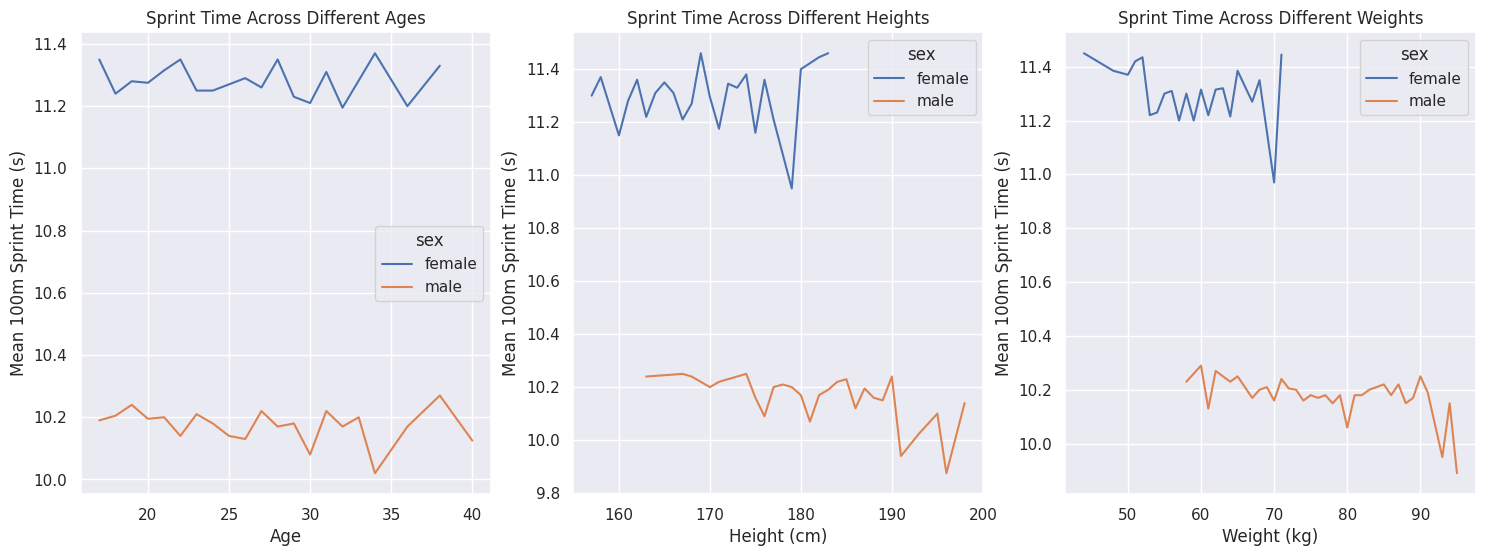

In [ ]:
# Visualization
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(18, 6))
features = ['Age', 'Height', 'Weight']
x_labels = ['Age', 'Height (cm)', 'Weight (kg)']
axes = [ax1, ax2, ax3]

for ax, feature, xlabel in zip(axes, features, x_labels):
  grouped_data = combined_df.groupby([feature, 'sex'])['mark'].median().reset_index()
  sns.lineplot(data=grouped_data, ax=ax, x=feature, y='mark', hue='sex')
  ax.set(
      title='Sprint Time Across Different ' + feature.capitalize() + 's',
      xlabel=xlabel,
      ylabel='Mean 100m Sprint Time (s)')
plt.show()


expected_ylabel = 'Mean 100m Sprint Time (s)'
for ax, xlabel in zip(axes, x_labels):
    assert ax.get_xlabel() == xlabel, "x-label must be a feature"
    assert ax.get_ylabel() == expected_ylabel, "y-label must be 'Mean 100m Sprint Time (s)'"

# **Plots Interpretations**

According to our plots, the aren't any clear trends related to how a characteristic affect an athelete's 100m sprint times, contrary to what we expected.

In [ ]:
def find_iqr(data, gender, feature):
  """
  This function takes a DataFrame, a specific gender and feature,
  and returns a DataFrame with outliers (below or beyond 1.5×IQR) removed.
  """
  temp_df = data[data['sex'] == gender]
  temp_df = temp_df[feature]

  Q1 = np.percentile(temp_df, 25)
  Q3 = np.percentile(temp_df, 75)
  iqr_numpy = Q3 - Q1

  upper_bound = Q3 + 1.5 * iqr_numpy
  lower_bound = Q1 - 1.5 * iqr_numpy

  return data[(data[feature] <= upper_bound) & (data[feature] >= lower_bound)]


# The use of .all() in the above assertions is based on this Error message:
# "The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()."
test_male_iqr = find_iqr(athletes_small_df, 'male', 'Height')
assert ((test_male_iqr['Height'] >= 174.0) & (test_male_iqr['Height'] <= 190.0)).all, (
    "feature value not within IQR bounds")

test_female_iqr = find_iqr(athletes_small_df, 'female', 'Height')
assert ((test_female_iqr['Height'] >= 159.75) & (test_female_iqr['Height'] <= 177.75)).all, (
    "feature value not within IQR bounds")



# Remove outliers in out dataset
features = ['Age', 'Height', 'Weight']
for gender, feature in zip(['male', 'female'], features):
  iqr_filtered_df = find_iqr(combined_df, gender, feature)

In [ ]:
def find_optimal_value(data, feature, threshold) -> float | None:
  """
  This function takes a DataFrame and a specific feature,
  and a threshold value.
  It returns the value of a given feature that corresponds to
  the lowest average sprint time, considering only groups with
  at least the specified number of athletes(threshold).
  """
  grouped_df = data.groupby(feature)['mark'].agg(['mean', 'count'])
  grouped_df = grouped_df[grouped_df['count'] >= threshold]
  if len(grouped_df) == 0:
    return None
  return grouped_df['mean'].idxmin()

assert find_optimal_value(athletes_small_df, 'Height', 2) == 180.0
assert find_optimal_value(athletes_small_df, 'Age', 100) is None, "threshold is too high"

In [ ]:
# Research question 1 - 3:
# What is the peak performance age for sprinters in the 100 meters?
# What is the best height for sprinters to perform best in the 100 meters?
# What is the best weight for sprinters to perform best in the 100 meters?
optimal_vals = {}

for gender in ['male', 'female']:
  print('Optimal values for ' + gender + ' :')
  gender_temp_df = iqr_filtered_df[iqr_filtered_df['sex'] == gender]
  features = ['Age', 'Height', 'Weight']
  optimal_vals[gender] = {}

  for feature in features:
    optimal_value = find_optimal_value(gender_temp_df, feature, 10)
    optimal_vals[gender][feature] = optimal_value

  print('Peak Performance Age: ' + str(optimal_vals[gender]['Age']) + ' years')
  print('Best Height for 100m: ' + str(optimal_vals[gender]['Height']) + ' cm')
  print('Best Weight for 100m: ' + str(optimal_vals[gender]['Weight']) + ' kg')
  print()

Optimal values for male :
Peak Performance Age: 22.0 years
Best Height for 100m: 176.0 cm
Best Weight for 100m: 80.0 kg

Optimal values for female :
Peak Performance Age: 32.0 years
Best Height for 100m: 179.0 cm
Best Weight for 100m: 70.0 kg



# **Statistical Hypothesis Testing on features**

### **Age**
Null Hypothesis (H₀):

There is no significant difference in performance between athletes who are at
the optimal age and those who are either younger or older.

Alternative Hypothesis (H₁):

There is a significant difference in performance between the two age groups.

### **Height**
Null Hypothesis (H₀):    

There is no significant difference in performance between athletes who are at
the optimal height and those who are either taller or shorter.  

Alternative Hypothesis (H₁):

There is a significant difference in performance between the two height groups.

### **Weight**
Null Hypothesis (H₀):  
There is no significant difference in performance between athletes who have
the optimal weight and those who are heavier or lighter.   
Alternative Hypothesis (H₁):  
There is a significant difference in performance between the two weight groups.

In [ ]:
# Use t-tests to verify the optimal values are significant
def feature_ttests(data, gender, feature, optimal_value) -> tuple:
  """
  This function takes a DataFrame, a gender type, a specific feature,
  and an optimal value of that feature.
  It performs a statistical t-test to compare race times between athletes with
  and without the optimal feature value.
  It returns a tuple containing the t_value and p-value.
  """
  temp_df = data[data['sex'] == gender]
  group_1 = temp_df[temp_df[feature] == optimal_value]['mark']
  group_2 = temp_df[temp_df[feature] != optimal_value]['mark']
  t_value, p_value = ttest_ind(group_1, group_2, equal_var=False)
  return t_value, p_value

In [ ]:
def interpret_p_value(p_value) -> None:
    """
    Prints interpretation of a p-value against significance level(0.05).
    """
    if p_value < 0.05:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")


features = ['Age', 'Height', 'Weight']
for gender in ['male', 'female']:
  print('t-test results for ' + gender + ' athletes:')
  for feature in features:
    optimal_value = optimal_vals[gender][feature]
    t_value, p_value = feature_ttests(combined_df, gender, feature, optimal_value)
    print(feature + ': p-value = ' + str(p_value))
    interpret_p_value(p_value)
    print()

t-test results for male athletes:
Age: p-value = 8.165267451177691e-05
Reject the null hypothesis

Height: p-value = 1.422079067758739e-07
Reject the null hypothesis

Weight: p-value = 1.0220251891086389e-16
Reject the null hypothesis

t-test results for female athletes:
Age: p-value = 0.00018590749708933036
Reject the null hypothesis

Height: p-value = 9.837869030114533e-05
Reject the null hypothesis

Weight: p-value = 0.024530445560267934
Reject the null hypothesis



In [ ]:
# Linear Regression Model
def model_parameters(reg, columns) -> str:
   """Returns a string with the linear regression model parameters for the given column names."""
   slopes = [f"{coef}({columns[i]})" for i, coef in enumerate(reg.coef_)]
   return " + ".join([f"{reg.intercept_:}"] + slopes)


def linear_regression_model(data) -> float:
  """
  This function takes a DataFrame, and builds a linear regression model
  to predict sprint times using features like age, height, and weight.
  It prints the best model found, which features are most important
  and returns a dictionary of mean squared error for both male and female athletes.
  """
  # Only select the features that you care about
  mse_dict = {}
  for gender in ['male', 'female']:
    filtered_df = data[data['sex'] == gender]
    filtered_df = filtered_df.loc[:, ["Age", "Height", "Weight", "mark"]]

    # We make same split every time in order to have a consistent model result
    # in our result report
    features = filtered_df.loc[:, ["Age", "Height", "Weight"]]
    target = filtered_df["mark"]
    features_train, features_test, target_train, target_test = train_test_split(features,
                                                                                target,
                                                                                test_size=0.2,
                                                                                random_state=0)


    # Feature Selection -
      # How many features do we actually need to include in our LinearRegressor method
      # and which one should we include
    model = LinearRegression()


    # RFE is used to find the actual features that matter
    rfe = RFE(estimator=model)


    # Use GridSearchCV to test when to stop dropping features for rfe
    search = GridSearchCV(
        estimator = rfe,
        param_grid= {
            "n_features_to_select": [1, 2, 3]
        },
        # Specify how you want to score each one
        scoring="neg_root_mean_squared_error",
        # Specify how much information you would to print out
        verbose=3,
    )
    # Test to see what is the best n_features_to_select
    search.fit(features_train, target_train)

    print(f"ML model to predict sprinter times for {gender} athletes")
    print()
    print(f"The best score is: {search.best_score_}")
    print(f"The best model is: {search.best_estimator_}")

    n = search.best_estimator_.n_features_to_select
    rfe = RFE(estimator=model, n_features_to_select=n)


    # Use rfe.fit to find what features matter in our model
    rfe.fit(features_train, target_train)


    # Print out the model that matters
    selected_features = features.columns[rfe.ranking_ == 1]
    print(f"The variables that matter in our model are: {list(selected_features)} ")

    final_model = rfe.estimator_
    print(f"The best model is: {model_parameters(final_model, selected_features)}")


    # Train the data on the training dataset
    final_model.fit(features_train, target_train)
    predictions = final_model.predict(features_test)


    # Test the MSE
    mse_linear = mean_squared_error(target_test, predictions)
    print(f"The mean squared error for this model is: {mse_linear}")
    print()
    mse_dict[gender] = mse_linear

  return mse_dict


mse_linear = linear_regression_model(combined_df)
for gender in ['male', 'female']:
  assert 0 < mse_linear[gender] < 1.0, f"MSE is too high: {mse_linear[gender]}"

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...........n_features_to_select=1;, score=-0.116 total time=   0.0s
[CV 2/5] END ...........n_features_to_select=1;, score=-0.115 total time=   0.0s
[CV 3/5] END ...........n_features_to_select=1;, score=-0.108 total time=   0.0s
[CV 4/5] END ...........n_features_to_select=1;, score=-0.116 total time=   0.0s
[CV 5/5] END ...........n_features_to_select=1;, score=-0.118 total time=   0.0s
[CV 1/5] END ...........n_features_to_select=2;, score=-0.115 total time=   0.0s
[CV 2/5] END ...........n_features_to_select=2;, score=-0.114 total time=   0.0s
[CV 3/5] END ...........n_features_to_select=2;, score=-0.107 total time=   0.0s
[CV 4/5] END ...........n_features_to_select=2;, score=-0.115 total time=   0.0s
[CV 5/5] END ...........n_features_to_select=2;, score=-0.117 total time=   0.0s
[CV 1/5] END ...........n_features_to_select=3;, score=-0.115 total time=   0.0s
[CV 2/5] END ...........n_features_to_select=3;, 

In [ ]:
def predict_star_athlete_time(model, gender) -> float:
    """
    This function redicts sprint time for a famous athlete using
    a decision tree regression model, and returns the predicted time.
    """
    if(gender == "male"):
      # Usain Bolt
      data = [[22, 196, 94]]
      name = "Usain Bolt"
      age = 22
    else:
      # Shelly Ann Fraser-Pryce
      data = [[32, 152, 57]]
      name = "Shelly Ann Fraser-Pryce"
      age = 32

    temp_df = pd.DataFrame(data, columns=['Age', 'Height', 'Weight'])
    prediction = model.predict(temp_df)
    print(f"According to our model, when {name} was {age} (optimal age), " +
          "who ran an approximate time of: " + str(prediction) + " seconds")

    return prediction


# Decision tree regressor
def decision_tree_regression(data) -> dict:
  """
  This function takes a DataFrame, and builds a decision tree regressor model
  to predict 100m sprint times using features like age, height, and weight.
  It also finds the best model and predicted times for real runners like Usain Bolt
  and Shelly-Ann Fraser-Pryce.
  It returns a dictionary containing the mean squared error, model, and prediction time
  of a famous runner for each gender.
  """
  results = {}

  for gender in ["male", "female"]:
    filtered_df = combined_df[combined_df['sex'] == gender]


    filtered_df = filtered_df.loc[:, ["Age", "Height", "Weight", "mark"]]

    features = filtered_df.loc[:, ["Age", "Height", "Weight"]]
    target = filtered_df["mark"]


    # Split data into testing and training datasets to avoid overfitting issues.
    features_train, features_test, target_train, target_test = train_test_split(features,
                                                                                target,
                                                                                test_size=0.2,
                                                                                random_state=0)

    depth_range = list(range(2, 21, 2))
    search = GridSearchCV(estimator = DecisionTreeRegressor(),
                          param_grid= {
                              "max_depth": depth_range},
                          scoring = "neg_root_mean_squared_error",
                          verbose = 3)
    search.fit(features_train, target_train)
    print(f"The best score is: {search.best_score_}")
    print(f"The best model is: {search.best_estimator_}")
    # Get the ideal depth for the estimator
    ideal_depth = search.best_estimator_.max_depth
    final_model = DecisionTreeRegressor(max_depth=ideal_depth)
    final_model.fit(features_train, target_train)

    predictions = final_model.predict(features_test)
    mse_tree = mean_squared_error(target_test, predictions)
    print(f"The mean squared error for this model is: {mse_tree}")

    # make prediction for a famous athlete to see how the model works
    predicted_time = predict_star_athlete_time(final_model, gender)

    results[gender] = {
            "mse": mse_tree,
            "model": final_model,
            "prediction": predicted_time
            }
  return results


dt_reg_model = decision_tree_regression(combined_df)

assert 0 < dt_reg_model["male"]["mse"] < 1.0, f"MSE is too high: {dt_reg_model['male']['mse']}"
assert 0 < dt_reg_model["female"]["mse"] < 1.0, f"MSE is too high: {dt_reg_model['female']['mse']}"

assert 9.0 < dt_reg_model["male"]["prediction"] < 11.0, "Unrealistic prediction for Usain Bolt"
assert 10.0 < dt_reg_model["female"]["prediction"] < 12.0, (
    "Unrealistic prediction for Shelly Ann Fraser-Pryce")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ......................max_depth=2;, score=-0.112 total time=   0.0s
[CV 2/5] END ......................max_depth=2;, score=-0.110 total time=   0.0s
[CV 3/5] END ......................max_depth=2;, score=-0.103 total time=   0.0s
[CV 4/5] END ......................max_depth=2;, score=-0.110 total time=   0.0s
[CV 5/5] END ......................max_depth=2;, score=-0.109 total time=   0.0s
[CV 1/5] END ......................max_depth=4;, score=-0.107 total time=   0.0s
[CV 2/5] END ......................max_depth=4;, score=-0.102 total time=   0.0s
[CV 3/5] END ......................max_depth=4;, score=-0.101 total time=   0.0s
[CV 4/5] END ......................max_depth=4;, score=-0.108 total time=   0.0s
[CV 5/5] END ......................max_depth=4;, score=-0.106 total time=   0.0s
[CV 1/5] END ......................max_depth=6;, score=-0.105 total time=   0.0s
[CV 2/5] END ......................max_depth=6;,

In [ ]:
# decision tree classifier
def decision_tree_classifier(data, gender, threshold) -> DecisionTreeClassifier:
  """
  This function takes a DataFrame, a specific gender type and a performance threshold,
  and then assigns a level of performance based on the threshold.
  It builds a decision tree classifier to predict whether an athlete is Elite or Competitive
  based on their best 100m sprint time, using features like age, height, and weight.
  It returns a decision tree classifier model and prints out the accuracy score for each gender.
  """
  athlete_best_score_df = combined_df.groupby('Name')[['mark']].idxmin()
  athlete_best_score_df["index"] = athlete_best_score_df["mark"]
  athlete_best_score_df = athlete_best_score_df.drop(columns=['mark'])
  filtered_df = combined_df.merge(athlete_best_score_df, left_on=combined_df.index, right_on='index')
  filtered_df = filtered_df.drop(columns=['index'])
  filtered_df = filtered_df[['Age', 'Height', 'Weight', 'mark', 'sex']]

  # filter by gender
  # assign level of performance based on threshold
  filtered_df = filtered_df[filtered_df['sex'] == gender]
  filtered_df.loc[:, 'Level'] = 'Competitive'
  filtered_df.loc[filtered_df['mark'] <= threshold, 'Level'] = 'Elite'
  filtered_df = filtered_df.drop(columns=['mark'])

  X = filtered_df[['Age', 'Height', 'Weight']]
  y = filtered_df['Level']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

  # find the best max_depth
  depth_range = list(range(1, 11))
  search = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid= {
                            "max_depth": depth_range},
                        scoring = "accuracy",
                        verbose = 3)
  search.fit(X_train, y_train)
  print(gender + ' athletes:')
  print(f"The best score is: {search.best_score_}")
  print(f"The best model is: {search.best_estimator_}")

  best_depth = search.best_estimator_.max_depth
  clf = DecisionTreeClassifier(max_depth=best_depth).fit(X_train, y_train)
  predictions = clf.predict(X_test)
  print(f"The accuracy score for this model is: {accuracy_score(y_test, predictions)}")

  return clf

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......................max_depth=1;, score=0.806 total time=   0.0s
[CV 2/5] END .......................max_depth=1;, score=0.774 total time=   0.0s
[CV 3/5] END .......................max_depth=1;, score=0.867 total time=   0.0s
[CV 4/5] END .......................max_depth=1;, score=0.800 total time=   0.0s
[CV 5/5] END .......................max_depth=1;, score=0.800 total time=   0.0s
[CV 1/5] END .......................max_depth=2;, score=0.806 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.774 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.833 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.800 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.833 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.806 total time=   0.0s
[CV 2/5] END .......................max_depth=3;

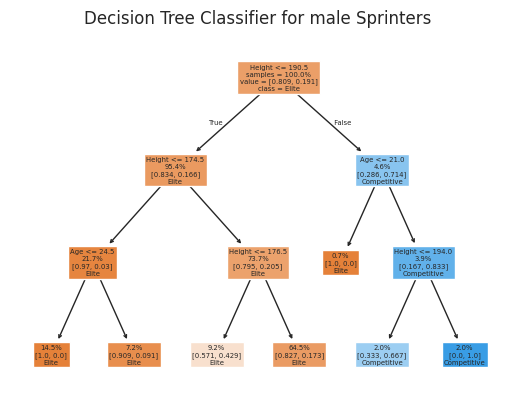

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......................max_depth=1;, score=0.632 total time=   0.0s
[CV 2/5] END .......................max_depth=1;, score=0.684 total time=   0.0s
[CV 3/5] END .......................max_depth=1;, score=0.684 total time=   0.0s
[CV 4/5] END .......................max_depth=1;, score=0.684 total time=   0.0s
[CV 5/5] END .......................max_depth=1;, score=0.632 total time=   0.0s
[CV 1/5] END .......................max_depth=2;, score=0.684 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.684 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.684 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.526 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.632 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.684 total time=   0.0s
[CV 2/5] END .......................max_depth=3;

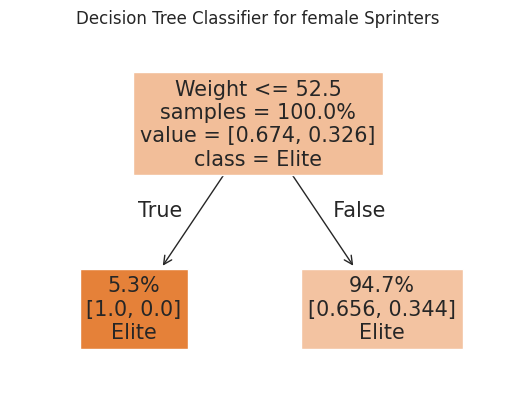

In [ ]:
# plot the decision tree for male and females
for gender, threshold in zip(['male', 'female'], [10.00, 11.07]):
  clf = decision_tree_classifier(combined_df, gender, threshold)
  plt.figure()
  plot_tree(
      clf,
      feature_names=['Age', 'Height', 'Weight'],
      class_names=["Elite", "Competitive"],
      label="root",
      filled=True,
      impurity=False,
      proportion=True,
      rounded=False
  )
  plt.title("Decision Tree Classifier for " + gender + " Sprinters")
  plt.show()

# **Results**

### **1. What is the peak performance age for sprinters in the 100 meters?**

We found that the peak performance age is 22 years old for male athletes and 32 years old for female athletes. This was determined by grouping athletes by age and calculating the average sprint time, identifying the age associated with the lowest mean performance time. The result suggests that female sprinters might maintain or reach peak form later in their careers compared to male athletes. This difference might be caused by physiological factors.


### **2. What is the best height for sprinters to perform best in the 100 meters?**

Our analysis shows that the optimal height for male sprinters is 176 cm, while for female sprinters it is 179 cm. These heights are associated with the lowest average sprint times in our dataset. The result for male athletes may have been slightly influenced by a few very tall sprinters who performed worse, which could have pulled the average down. Interestingly, It's opposite for female athletes. Taller female sprinters tended to perform better in our dataset, suggesting that height may have a more positive impact on sprint performance for women than for men, which is consistent with the results from our linear regression model.


### **3. What is the best weight for sprinters to perform best in the 100 meters?**

We found that the optimal weight for male athletes is 80 kg, while for female athletes it is 70 kg. These weights likely reflect an ideal balance between muscle power and body mass, where athletes need to have enough muscle mass to generate power in short races. It's important to note that this doesn't mean all top sprinters fall exactly in this weight range. Other factors like technique, body composition, and training also play a big role.


### **4. Can we create a model which accurately predict a world class sprinter 100m time?**

The creation of 2 models allowed us flexibility in finding which algorithm is better to use for creating a model that accurately predicts the 100m times of atheltes based on their age, height, and weight. Using the MSE values from both models, we concluded that the DecisionTreeRegressor algo represent the relationship between the variables better than LinearRegressor.

**LinearRegression Model Results:**

*   For male athletes, the model showed that height and weight were the most significant predictors of sprint performance. The model formula was: Time = 10.82 - 0.00259 x Height - 0.00261 x Weight, with a mean squared error of about 0.012, suggesting a strong fit.

*   For female athletes, the model found height to be the most important features. The formula was: Time = 10.58 + 0.00404 x Height, with a mean squared error of around 0.028.

These results suggest that performance factors in sprinting can vary across genders, possibly due to differences in training and physiology between genders.

**DecisionTreeRegressor Model Results:**

*   For male athletes, the ideal depth is 20 with a MSE of 0.0073498243463744305
*   For female atheletes, the ideal depth is 18 with MSE of 0.01385667783044404

Both of these numbers are smaller than those of the LinearRegression model.

The 3 scikit learn algorithm that we learned in class is LinearRegressor, DecisionTreeRegressor and DecisionTreeClassifier. Since we are creating a model which predicts a numerical variable, the 2 regressor algorithm is more appropriate to evaluate. DecisionTreeClassiifer, on the oher hand, is better at predicting categorical variables. From the 2 regressor algorithms, we concluded that the DecisionTreeRegressor predicts the 100m time for athletes more accurately due to its lower MSE.

### **5. Can we classify an athlete's competition level (elite vs competitive) based on age, height and weight?**

For both female and male athletes, the ideal max depth is 1. For male atheletes, the accuracy score of the model is approximately 0.82 and for female, the accuracy score is approximately 0.79.


# **Limitations:**
Our machine learning model is built using data from the Olympic dataset, which includes only elite-level athletes. As a result, the model's predictions are specific to world-class performers and may not generalize to amateur or youth athletes.

Additionally, the dataset does not reflect changes in certain features over time. For instance, an athlete's height and weight remain constant across multiple seasons in the dataset we used. A clear example is Usain Bolt, who appears multiple times in the dataset but always with the same height and weight values.

The dataset is also limited in scope, containing only a few basic features. Important factors that can significantly influence sprint performance, such as wind speed, reaction time, diet, and injury history, are not included. Moreover, the dataset does not indicate the stage of competition (e.g., heats vs. finals), which is critical, since athletes may intentionally run slower in preliminary rounds to conserve energy.

Moreover, we made same split every time in all three models in order to get a
consistent result that we can interpret in "Results". However, doing this would
potentially include overfitting issues in our models.

# **Implications:**
The results of our analysis and the linear regression model we developed can be useful for athletes and coaches seeking to optimize sprint performance. It offers a data-driven perspective on how certain physical attributes are associated with faster sprint times, and could potentially inform training or recruitment strategies.

One possible concern is that individuals who do not fully understand the context behind the model might interpret the results too literally. For example, someone might assume that simply matching the identified "optimal" height or weight guarantees peak performance. Without considering the broader factors that contribute to athletic success, such misinterpretation could lead to misleading or unrealistic expectations.